### SMOTE(Synthetic Minority Oversampling Technique)
SMOTE is a technique used in machine learning to adress imbalanced datasets where the minority class has significantly fewer instances than the majority class.SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances

In [1]:
# used to make imbalnced datasets
from sklearn.datasets import make_classification

In [3]:
# X dependent features
# y independent features

X,y = make_classification(n_samples=1000,
                    n_features=2,
                    n_clusters_per_class=1,
                    weights=[0.9],
                    n_redundant=0,
                    random_state=1)

In [4]:
X

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [5]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
import pandas as pd
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])

final_df = pd.concat([df1,df2],axis=1)

In [7]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [8]:
final_df.shape

(1000, 3)

In [11]:
# thus it is an imbalanced dataset
final_df['target'].value_counts()

0    894
1    106
Name: target, dtype: int64

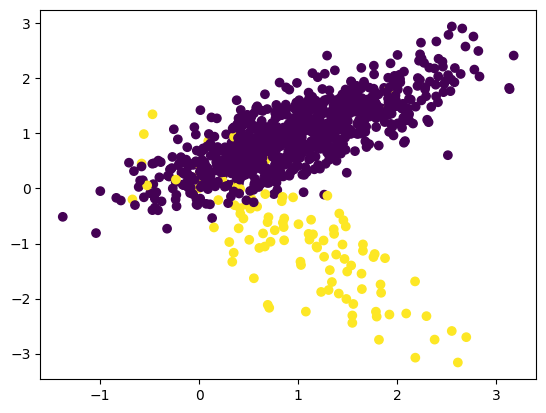

In [15]:
# lets plot it 
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])
plt.show()

In [16]:
!pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 872.8 kB/s eta 0:00:0000:010:01


In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
# transform the dataset
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [19]:
X.shape

(1788, 2)

In [22]:
X.head()

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529


In [20]:
y.shape

(1788,)

In [23]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [24]:
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])

oversampled_df = pd.concat([df1,df2],axis=1)

In [25]:
# Now it is an balanced dataset
oversampled_df['target'].value_counts()

1    894
0    894
Name: target, dtype: int64

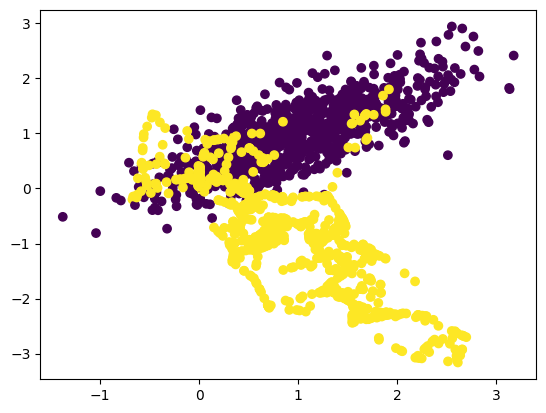

In [28]:
# we can see our minority has been oversampled
plt.scatter(oversampled_df['f1'],oversampled_df['f2'],c=oversampled_df['target'])
plt.show()